In [2]:
import pandas as pd
import re #re stands for the regular expression module, which provides a set of tools for matching and manipulating text patterns.
import spacy

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
# Loading the dataset
data = pd.read_csv('data_after_EDA.csv')
# Print the first 5 rows of the dataframe.
data.head()

,ROWNUM,Hospital,Eligibility Class,Gender,Arrival Time,Severity Level,Deparment,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes),Treatment Time(Minutes),Cluster,No Treatment
0,1,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-13 13:17:48,Level Ⅳ,Emergency Medicine,"Pain, unspecified",2023-12-13 16:43:00,14.0,205.0,191.0,2,0
1,2,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-08 10:59:28,Level Ⅲ,Emergency Medicine,Low back pain,2023-12-08 12:50:00,7.0,111.0,104.0,1,0
2,3,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-11-05 14:03:02,Level Ⅲ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-11-05 14:54:00,24.0,51.0,27.0,1,0
3,4,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-07 22:57:41,Level Ⅲ,Emergency Medicine,Epistaxis,2023-10-08 00:09:00,26.0,71.0,0.0,1,1
4,5,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-21 21:32:17,Level Ⅳ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-10-21 23:10:00,56.0,98.0,42.0,0,0


In [7]:

df = pd.DataFrame(data, columns=['Main Diagnosis'])

# Step 1: Lowercase all the entries in the 'Main Diagnosis' column
df['Main Diagnosis'] = df['Main Diagnosis'].str.lower()

# Step 2: Handle missing values by replacing NaN or empty strings with "Unknown"
df['Main Diagnosis'] = df['Main Diagnosis'].fillna('Unknown')

# Step 3: Remove punctuation or special characters from the diagnoses
df['Main Diagnosis'] = df['Main Diagnosis'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Step 4: Standardize some common diagnoses (as an example)
df['Main Diagnosis'] = df['Main Diagnosis'].replace({
    'acute upper respiratory infection unspecified': 'upper respiratory infection',
    'low back pain': 'back pain',
   
})

print(df['Main Diagnosis'])



0                                         pain unspecified
1                                                back pain
2                              upper respiratory infection
3                                                epistaxis
4                              upper respiratory infection
                               ...                        
97085                                   asthma unspecified
97086                          upper respiratory infection
97087                          upper respiratory infection
97088    cutaneous abscess furuncle and carbuncle unspe...
97089                          pain in limb multiple sites
Name: Main Diagnosis, Length: 97090, dtype: object


In [9]:
from tqdm import tqdm
import spacy # to visualiza the process

In [10]:
#Tokenizer
# Function to apply spaCy processing and tokenize the Main Diagnosis column
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply spaCy tokenizer to the 'Main Diagnosis' column
tqdm.pandas()  
df['Main Diagnosis Tokens'] = df['Main Diagnosis'].progress_apply(lambda x: spacy_tokenizer(str(x).lower()))

# Display the tokenized diagnosis column
print(df[['Main Diagnosis', 'Main Diagnosis Tokens']])



100%|██████████| 97090/97090 [09:14<00:00, 174.95it/s]

                                          Main Diagnosis  \
0                                       pain unspecified   
1                                              back pain   
2                            upper respiratory infection   
3                                              epistaxis   
4                            upper respiratory infection   
...                                                  ...   
97085                                 asthma unspecified   
97086                        upper respiratory infection   
97087                        upper respiratory infection   
97088  cutaneous abscess furuncle and carbuncle unspe...   
97089                        pain in limb multiple sites   

                                   Main Diagnosis Tokens  
0                                    [pain, unspecified]  
1                                           [back, pain]  
2                        [upper, respiratory, infection]  
3                                          

In [46]:
# Remove the stop words
#  Load spaCy stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Function to remove stop words from the tokens
def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply tqdm to monitor the process
tqdm.pandas(desc="Removing Stop Words")

# Apply the stop word removal function with a progress bar
df['Main Diagnosis Tokens Without Stopwords'] = df['Main Diagnosis Tokens'].progress_apply(remove_stop_words)

# Display the updated tokenized diagnosis column without stop words
print(df[['Main Diagnosis', 'Main Diagnosis Tokens Without Stopwords']])

Removing Stop Words: 100%|██████████| 97090/97090 [00:00<00:00, 454613.93it/s]

                                          Main Diagnosis  \
0                                    [pain, unspecified]   
1                                                 [pain]   
2                        [upper, respiratory, infection]   
3                                            [epistaxis]   
4                        [upper, respiratory, infection]   
...                                                  ...   
97085                              [asthma, unspecified]   
97086                    [upper, respiratory, infection]   
97087                    [upper, respiratory, infection]   
97088  [cutaneous, abscess, furuncle, carbuncle, unsp...   
97089                       [pain, limb, multiple, site]   

                 Main Diagnosis Tokens Without Stopwords  
0                                    [pain, unspecified]  
1                                                 [pain]  
2                        [upper, respiratory, infection]  
3                                          

In [47]:
from tqdm import tqdm

# Enable progress bar for pandas
tqdm.pandas(desc="Lemmatizing Tokens")

# Function to apply spaCy lemmatization to tokens
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Process the tokens into a single string
    return [token.lemma_ for token in doc]  # Return the lemmatized tokens

# Apply the lemmatization function with a progress bar
df['Main Diagnosis Lemmatized'] = df['Main Diagnosis Tokens Without Stopwords'].progress_apply(lemmatize_tokens)

# Display the lemmatized tokens
print(df[['Main Diagnosis', 'Main Diagnosis Lemmatized']])


Lemmatizing Tokens: 100%|██████████| 97090/97090 [09:00<00:00, 179.75it/s]

                                          Main Diagnosis  \
0                                    [pain, unspecified]   
1                                                 [pain]   
2                        [upper, respiratory, infection]   
3                                            [epistaxis]   
4                        [upper, respiratory, infection]   
...                                                  ...   
97085                              [asthma, unspecified]   
97086                    [upper, respiratory, infection]   
97087                    [upper, respiratory, infection]   
97088  [cutaneous, abscess, furuncle, carbuncle, unsp...   
97089                       [pain, limb, multiple, site]   

                               Main Diagnosis Lemmatized  
0                                    [pain, unspecified]  
1                                                 [pain]  
2                        [upper, respiratory, infection]  
3                                          

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the lemmatized tokens back into strings
df['Main Diagnosis Lemmatized Text'] = df['Main Diagnosis Lemmatized'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
bow_matrix = vectorizer.fit_transform(df['Main Diagnosis Lemmatized Text'])

# Convert the BoW matrix to a DataFrame for better readability (optional)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
print(bow_df)



       1419  1500  2025  2029  2499  2633  3039  32  3437  37  ...  wheeze  \
0         0     0     0     0     0     0     0   0     0   0  ...       0   
1         0     0     0     0     0     0     0   0     0   0  ...       0   
2         0     0     0     0     0     0     0   0     0   0  ...       0   
3         0     0     0     0     0     0     0   0     0   0  ...       0   
4         0     0     0     0     0     0     0   0     0   0  ...       0   
...     ...   ...   ...   ...   ...   ...   ...  ..   ...  ..  ...     ...   
97085     0     0     0     0     0     0     0   0     0   0  ...       0   
97086     0     0     0     0     0     0     0   0     0   0  ...       0   
97087     0     0     0     0     0     0     0   0     0   0  ...       0   
97088     0     0     0     0     0     0     0   0     0   0  ...       0   
97089     0     0     0     0     0     0     0   0     0   0  ...       0   

       willebrand  window  wound  wrist  xray  yaw  young  zoon

In [49]:
# Display the first few entries
print(df['Main Diagnosis Lemmatized'].head())
# Display the first few entries
print(df['Main Diagnosis Lemmatized Text'].head())
import spacy
# Load the English language model
nlp = spacy.load('en_core_web_sm')  # Replace with your specific model if different
df['Main Diagnosis Lemmatized Text'] = df['Main Diagnosis Lemmatized Text'].fillna('')
df = df[df['Main Diagnosis Lemmatized Text'].str.strip() != '']
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
vectorizer.fit(df['Main Diagnosis Lemmatized Text'])

# Check the vocabulary size
print("Vocabulary size:", len(vectorizer.vocabulary_))


0                [pain, unspecified]
1                             [pain]
2    [upper, respiratory, infection]
3                        [epistaxis]
4    [upper, respiratory, infection]
Name: Main Diagnosis Lemmatized, dtype: object
0               pain unspecified
1                           pain
2    upper respiratory infection
3                      epistaxis
4    upper respiratory infection
Name: Main Diagnosis Lemmatized Text, dtype: object
Vocabulary size: 1554


In [50]:
print(vectorizer.vocabulary_)
# Take a sample text
sample_text = df['Main Diagnosis Lemmatized Text'].iloc[0]
print("Sample Text:", sample_text)

# Use the vectorizer's tokenizer
tokens = vectorizer.build_tokenizer()(sample_text)
print("Tokens:", tokens)
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
vectorizer.fit(df['Main Diagnosis Lemmatized Text'])
bow_matrix = vectorizer.transform(df['Main Diagnosis Lemmatized Text'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.head())

vectorizer = CountVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b")
vectorizer = CountVectorizer(
    token_pattern=r"(?u)\b[a-zA-Z_][a-zA-Z_]+\b",  # Tokens with letters only
    stop_words=None
)
vectorizer.fit(df['Main Diagnosis Lemmatized Text'])
bow_matrix = vectorizer.transform(df['Main Diagnosis Lemmatized Text'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df.head())
print("BoW matrix shape:", bow_matrix.shape)
print("Non-zero entries in BoW matrix:", bow_matrix.nnz)


{'pain': 998, 'unspecified': 1474, 'upper': 1477, 'respiratory': 1184, 'infection': 696, 'epistaxis': 455, 'joint': 758, 'ankle': 76, 'foot': 525, 'issue': 752, 'repeat': 1180, 'prescription': 1116, 'bronchitis': 175, 'specify': 1290, 'acute': 31, 'chronic': 245, 'subdural': 1337, 'haemorrhage': 596, 'acutenontraumatic': 32, 'myalgia': 889, 'multiple': 883, 'site': 1268, 'allergy': 55, 'medical': 834, 'care': 205, 'headache': 604, 'dizziness': 385, 'giddiness': 564, 'abdominal': 13, 'conjunctivitis': 285, 'gastroenteritis': 553, 'colitis': 260, 'origin': 982, 'dental': 344, 'carie': 207, 'chest': 237, 'benign': 140, 'paroxysmal': 1015, 'vertigo': 1514, 'antipsychotic': 83, 'neuroleptic': 915, 'throat': 1404, 'cough': 308, 'abnormal': 14, 'uterine': 1490, 'vaginal': 1494, 'bleeding': 154, 'fever': 498, 'cutaneous': 322, 'abscess': 18, 'furuncle': 544, 'carbuncle': 202, 'cellulitis': 218, 'dysuria': 412, 'unknown': 1470, 'shoulder': 1254, 'region': 1174, 'gastritis': 552, 'mention': 847,

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
print(df['Main Diagnosis Lemmatized String'].head())

0               pain unspecified
1                           pain
2    upper respiratory infection
3                      epistaxis
4    upper respiratory infection
Name: Main Diagnosis Lemmatized String, dtype: object


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [20]:
# Join tokens back to string format for CountVectorizer
df['Processed Text'] = df['Main Diagnosis Lemmatized'].apply(lambda x: ' '.join(x))

# Initialize the CountVectorizer (BoW)
vectorizer = CountVectorizer()

# Fit the vectorizer on the processed text and transform into a sparse matrix
print("Generating BoW matrix...")
bow_matrix = vectorizer.fit_transform(df['Processed Text'])

print(f"BoW matrix shape: {bow_matrix.shape}")

Generating BoW matrix...
BoW matrix shape: (97090, 1554)


Applying PCA for Dimensionality Reduction...


/var/folders/s9/js1_pzls6t9cp_gclfqd6yn80000gn/T/ipykernel_45072/1098154062.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(bow_pca[:, 0], bow_pca[:, 1], s=5, cmap='viridis')


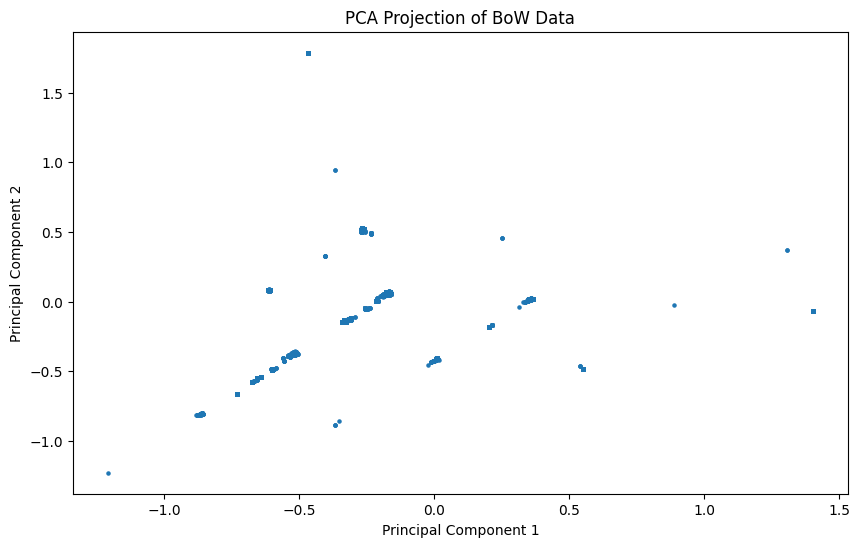

In [22]:
# Convert sparse matrix to dense using toarray() instead of todense()
print("Applying PCA for Dimensionality Reduction...")
bow_pca = pca.fit_transform(bow_matrix.toarray())  # Convert sparse matrix to NumPy array for PCA

# Visualize the result in 2D
plt.figure(figsize=(10, 6))
plt.scatter(bow_pca[:, 0], bow_pca[:, 1], s=5, cmap='viridis')
plt.title('PCA Projection of BoW Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Applying K-Means Clustering...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


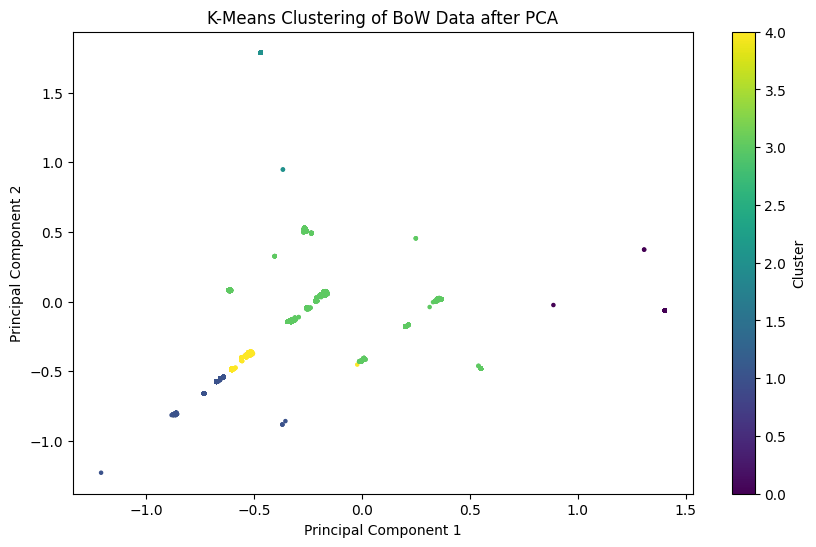

Silhouette Score: 0.78


In [24]:
# Apply K-Means clustering
print("Applying K-Means Clustering...")
k = 5  # You can adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model on the PCA-reduced data
clusters = kmeans.fit_predict(bow_pca)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(bow_pca[:, 0], bow_pca[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('K-Means Clustering of BoW Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(bow_pca, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

In [27]:
from sklearn.manifold import TSNE
import time

In [28]:
# Apply t-SNE
print("Applying t-SNE for Dimensionality Reduction...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)

# Create a simulated gauge to show progress
total_iterations = 3000
with tqdm(total=total_iterations, desc="Applying t-SNE") as pbar:
    for i in range(100):  # Simulate 100 steps of progress
        time.sleep(0.03)  # Simulate the process
        pbar.update(total_iterations // 100)  # Update the progress bar
    # Fit t-SNE (this step might take time without internal progress feedback)
    bow_tsne = tsne.fit_transform(bow_matrix.toarray())

# Plot the result of t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(bow_tsne[:, 0], bow_tsne[:, 1], s=10, cmap='viridis')
plt.title("t-SNE Projection of BoW Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Applying t-SNE for Dimensionality Reduction...


Applying t-SNE: 100%|██████████| 3000/3000 [00:03<00:00, 880.10it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Applying t-SNE: 100%|██████████| 3000/3000 [06:52<00:00,  7.27it/s] 


KeyboardInterrupt: 